In [1]:
from keras.datasets import imdb
import nltk
from nltk.util import ngrams
import spacy
import numpy as np
from nltk import word_tokenize

In [2]:
(training_data, training_targets), (testing_data, testing_targets) = imdb.load_data()

index = imdb.get_word_index()
reverse_index = dict([(value, key) for (key, value) in index.items()])

In [3]:
nltk.download('punkt')

sp = spacy.load('en_core_web_sm')
stop_words = sp.Defaults.stop_words

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
x = 0
y = 0
train_data = []
test_data = []

# Reverting training data back to original text
while x < len(training_data):

    decode_train = " ".join([reverse_index.get(i - 3, '') for i in training_data[x]])
    train_data.append(" ".join([w for w in word_tokenize(decode_train) if not w in stop_words and w != "'s" and w != "br" and w != "'"]))
    x += 1

# Reverting testing data back to original text 
while y < len(testing_data):

    decode_test = " ".join([reverse_index.get(i - 3, '') for i in testing_data[y]])
    test_data.append(" ".join([w for w in word_tokenize(decode_test) if not w in stop_words  and w != "'s" and w != "br" and w != "'"]))
    y += 1

testing_targets = np.resize(testing_targets, len(test_data))
training_targets = np.resize(training_targets, len(train_data))

print(len(train_data), len(test_data))

25000 25000


**Producing Top 20 Unigrams**

In [ ]:
def extract_unigrams(data):
  tokens = []
  for sentence in data:
    tok = word_tokenize(sentence)
    for t in tok:
      tokens.append(t)
  print(nltk.FreqDist(tokens).most_common(20))

In [ ]:
extract_unigrams(train_data)

**Producing Top 20 Bigrams** 

In [ ]:
def extract_bigrams(data):
  all_bigrams = []
  for sentence in data:
    token = word_tokenize(sentence)
    bigrams = ngrams(token,2)
    for b in bigrams:
      all_bigrams.append(b)
  print(nltk.FreqDist(all_bigrams).most_common(20))

In [ ]:
extract_bigrams(train_data)

**Text Representation**

**Bag of Words**

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=20)

bag_of_words_train = vectorizer.fit_transform(train_data)
bow_train = bag_of_words_train.toarray()

bag_of_words_test = vectorizer.fit_transform(test_data)
bow_test = bag_of_words_test.toarray()

**Decision Tree**

In [25]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', max_depth = 5).fit(bow_train, training_targets)

Prediction Accuracy:  64.63600000000001 %
              precision    recall  f1-score   support

    Negative       0.71      0.50      0.58     12500
    Positive       0.61      0.80      0.69     12500

    accuracy                           0.65     25000
   macro avg       0.66      0.65      0.64     25000
weighted avg       0.66      0.65      0.64     25000

Confusion matrix:
[[6189 6311]
 [2530 9970]]


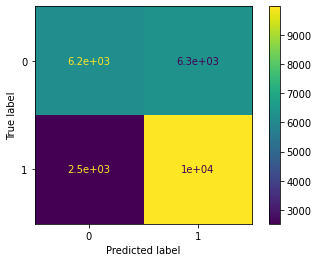

In [26]:
from sklearn.metrics import classification_report
from sklearn import metrics

print("Prediction Accuracy: ", tree.score(bow_test, testing_targets)*100, "%")

prediction = tree.predict(bow_test)
target_name = ["Negative", "Positive"]
print(classification_report(testing_targets, prediction, target_names=target_name))

disp = metrics.plot_confusion_matrix(tree, bow_test, testing_targets)
print("Confusion matrix:\n%s" % disp.confusion_matrix)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


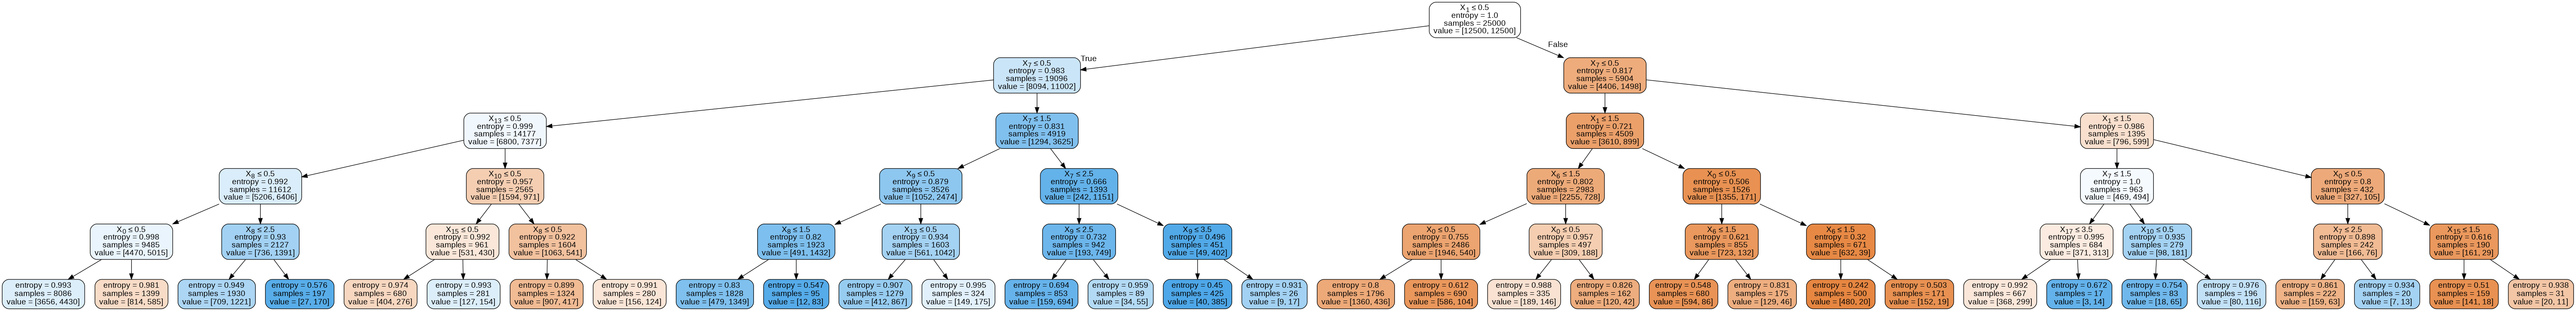

In [27]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())